# KNN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading dataset
dataset = pd.read_csv('zomato.csv', encoding='latin-1')

In [13]:
dataset.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [28]:
dataset2 = dataset.drop(columns=['Restaurant Name','City','Address','Locality','Locality Verbose','Cuisines','Has Table booking','Has Online delivery','Is delivering now','Switch to order menu','Rating color','Rating text','Currency'])

In [33]:
dataset2

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
0,6317637,162,121.027535,14.565443,1100,3,4.8,314
1,6304287,162,121.014101,14.553708,1200,3,4.5,591
2,6300002,162,121.056831,14.581404,4000,4,4.4,270
3,6318506,162,121.056475,14.585318,1500,4,4.9,365
4,6314302,162,121.057508,14.584450,1500,4,4.8,229
...,...,...,...,...,...,...,...,...
9546,5915730,208,28.977392,41.022793,80,3,4.1,788
9547,5908749,208,29.041297,41.009847,105,3,4.2,1034
9548,5915807,208,29.034640,41.055817,170,4,3.7,661
9549,5916112,208,29.036019,41.057979,120,4,4.0,901


In [29]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC: %.2f" % auc(fpr, tpr))

In [44]:
# Split Feature and Label
X = dataset2.loc[: ,dataset2.columns != 'Country Code']
y = dataset2['Country Code'] # target / label

In [45]:
#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [47]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [48]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [53]:
y_pred = model.predict(X_test)

In [54]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[1724    0    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    6    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   1    0   12    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     3]
 [   0    0    0    0    4    0    0    0    0    0    0    0    0    0
     0]
 [   0    1    0    0    0    5    0    0    0    0    0    0    0    0
     0]
 [   1    0    0    0    0    0    7    0    0    0    0    0    0    0
     0]
 [   0    0    0    0    0    0    0    3    0    0    0    0    1    0
     0]
 [   1    0    0    0    0    0    0    0    4    0    0    0    0    0
     0]
 [   0    0    0    0    0    0    0    0    0   13    0    0    0    0
     0]
 [   1    0    0    0    0    0    0    0    0    0    5    0    0    0
     0]
 [   0    0    0    0    0    0    0    0    0    0    0    5    0    0
     0]
 [   4    0    0    0    0    0    0    

In [55]:
score = model.score(X_test, y_test)
print(score)

0.9921507064364207


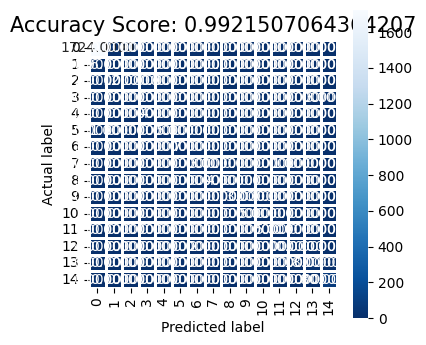

In [56]:
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".4f", linewidths=.8, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);